# I Программирование

1. Написать алгоритм сравнения версий формата x.x.x без использования дополнительных библиотек.
Если vers2 менее новая, чем vers1, то выводим 1;
если vers2 более новая, чем vers1, , то выводим -1
если версии одинаковы - выводим 0;

Примеры:
* Для ver1 = "1.2.2" и ver2 = "1.2.0" version_cmpr(ver1, ver2) = 1;
* Для ver1 = "1.0.5" и ver2 = "1.1.0" version_cmpr(ver1, ver2) = -1;
* Для ver1 = "1.0.5" и ver2 = "1.00.05", version_cmpr(ver1, ver2) = 0;

In [196]:
def version_cmpr(ver1, ver2):
  versions = [ver1, ver2]
  list1 = list(map(int, ver1.split('.')))
  list2 = list(map(int, ver2.split('.')))

  output = ''
  for i in range(3):
    if list1[i] > list2[i]:
      return 1
    if list1[i] < list2[i]:
      return -1
    elif list1[i] == list2[i]:
      i += 1
      if i == 3:
        return 0

In [198]:
#version_cmpr('1.2.2', '1.2.0')
#version_cmpr('1.0.5', '1.1.0')
version_cmpr('1.0.5', '1.00.05')

0

2. Есть отсортированный массив чисел. За O(N) по памяти и по времени реализовать функцию, которая вернет отсортированный массив квадратов этих чисел

Примеры:

lst= [-6, -4, -1, 2, 3, 5]: вывод sorting_squared(lst) = [1, 4, 9, 16, 25, 36]

lst= [-2, -1, 0, 0, 3, 4]: вывод sorting_squared(lst) = [0, 0, 1, 4, 9, 16]

In [194]:
def sorting_squared(lst):
  left = 0
  right = len(lst) - 1
  sqrt_sorted = []

  while left <= right:
      if lst[left] ** 2 > lst[right] ** 2:
          sqrt_sorted.append(lst[left] ** 2)
          left += 1
      else:
          sqrt_sorted.append(lst[right] ** 2)
          right -= 1
  sqrt_sorted.reverse()

  return sqrt_sorted

In [195]:
lst = [-5, -3, 0, 1, 3, 6]
lst1= [-6, -4, -1, 2, 3, 5]
lst2= [-2, -1, 0, 0, 3, 4]
sorting_squared(lst1)

[1, 4, 9, 16, 25, 36]

3. Есть шахматная доска размером N на M, на клетке (x,y) стоит конь.
Реализовать функцию solution(N, M, K, x, y), которая возвращает вероятность того, что двигаясь случайно (по правилам коня) K раз:

а) конь останется на шахматной доске (если один раз вышел за пределы доски - уже не может вернуться),

б) конь окажется в той же стартовой клетке (x,y).

In [205]:
def solution(N, M, K, x, y):
  step_count = 0
  for i in range(1, 9):
      row = ''
      for j in range(1, 9):
          if abs(y - i) + abs(x - j) == 0: 
            row += 'K '
          elif (y - i) * (x - j) in [-2, 2]: 
            row += '* '
            step_count += 1
          else: 
            row += '. '
      print(row.rstrip())
  proba = step_count / (N * M)
  return proba

In [209]:
solution(10, 8, 3, 1, 2)

. . * . . . . .
K . . . . . . .
. . * . . . . .
. * . . . . . .
. . . . . . . .
. . . . . . . .
. . . . . . . .
. . . . . . . .


0.0375

# II Базы данных

Описание таблиц и полей в базе данных

DB.SALES- таблица продаж в разрезе товар магазин день
* date - Дата в формате DATE
* store - Магазин
* item - Товар
* qnt - Количество проданных штук на конец дня
* stock - Остаток на конец дня

DB.KEY_CATS- Таблица с категориями
* item - Товар
* category - Товарная категория

DB.PRICES - Таблица цен и себестоимостей в разрезе товар-магазин день
* date - Дата
* store - Магазин
* item - Товар
* price - Цена
* cog - Себестоимость

1. Написать запрос и вывести суммарную выручку и прибыльность в разрезе категория-магазин за последние 14 дней.

Выручка = цена * количество проданных единиц

Прибыльность = (цена * количество проданных единиц - себестоимость * количество проданных единиц) / цена * количество проданных единиц

In [ ]:
CREATE PROCEDURE solution1()
BEGIN
  SELECT s.store,
         k.category,
         SUM(s.qnt*p.price) AS v, 
         SUM((s.qnt*p.price-p.cog*s.qnt)/p.price*s.qnt)
  FROM SALES s
  JOIN KEY_CATS k ON s.item = k.item
  JOIN PRICES p ON s.store=p.store and s.item=p.item and s.date=p.date
  WHERE s.date > CURDATE()-INTERVAL 14 DAY
  GROUP BY s.store, k.category
END

2. Вывести первые 5 самых продаваемых категорий за последний год, а также количество проданных штук и выручку в этих категориях

In [ ]:
CREATE PROCEDURE solution2()
BEGIN
	SELECT TOP(5) k.category, SUM(s.qnt) AS year_cnt, SUM(s.qnt*p.price) AS revenue
	FROM SALES s
	JOIN KEY_CATS k ON s.item=k.item
	JOIN PRICES p ON s.store=p.store AND s.item=p.item AND s.date=p.date
	WHERE s.date > DATEADD(year,-1,GETDATE())
	GROUP BY k.category
	ORDER BY 2 DESC
END


3. Определить дни дефицита (остаток на конец дня равен нулю). Если продажи в этот день меньше, чем средние продажи за предыдущие 14 дней, то заменить значение продаж на среднее за последние 14 дней.

In [ ]:
CREATE PROCEDURE solution3()
BEGIN
	SELECT s.date,
	
	CASE 
		WHEN s.qnt < AVG(s_past.qnt) 
		THEN AVG(s_past.qnt)
		ELSE s.qnt 
	END AS sales_qnt 
	FROM SALES s
	JOIN SALES s_past ON s_past.date BETWEEN s.date- INTERVAL 14 DAY AND s.date-INTERVAL 1 DAY
	WHERE s.stock=0
	GROUP BY s.date
END

# III. Анализ данных

Предлагается провести первичный анализ и изучение данных (eda) для задачи оттока пользователей, подсветить проблемы в данных, а также определить основные факторы влияющие на отток + предложить дальнейшие шаги.

In [97]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import warnings
warnings.simplefilter('ignore')

# Загрузка датасета в формате .csv в Pandas DataFrame
df = pd.read_csv('churn_dataset.csv')

# Просмотрим первые 5 строк
df.head()

State  Account length  Area code International plan Voice mail plan  \
0    KS             128        415                 No             Yes   
1    OH             107        415                 No             Yes   
2    NJ             137        415                 No              No   
3    OH              84        408                Yes              No   
4    OK              75        415                Yes              No   

   Number vmail messages  Total day minutes  Total day calls  \
0                     25              265.1              110   
1                     26              161.6              123   
2                      0              243.4              114   
3                      0              299.4               71   
4                      0              166.7              113   

   Total day charge  Total eve minutes  Total eve calls  Total eve charge  \
0             45.07              197.4               99             16.78   
1             27.47              195.5              103             16.62   
2             41.38              121.2              110             10.30   
3             50.90               61.9               88              5.26   
4             28.34              148.3              122             12.61   

   Total night minutes  Total night calls  Total night charge  \
0                244.7                 91               11.01   
1                254.4                103               11.45   
2                162.6                104                7.32   
3                196.9                 89                8.86   
4                186.9                121                8.41   

   Total intl minutes  Total intl calls  Total intl charge  \
0                10.0                 3               2.70   
1                13.7                 3               3.70   
2                12.2                 5               3.29   
3                 6.6                 7               1.78   
4                10.1                 3               2.73   

   Customer service calls  Churn  
0                       1  False  
1                       1  False  
2                       0  False  
3                       2  False  
4                       3  False

In [98]:
# Посмотрим статистику по числовым признакам
df.describe()

Account length    Area code  Number vmail messages  Total day minutes  \
count     3333.000000  3333.000000            3333.000000        3333.000000   
mean       101.064806   437.182418               8.099010         179.775098   
std         39.822106    42.371290              13.688365          54.467389   
min          1.000000   408.000000               0.000000           0.000000   
25%         74.000000   408.000000               0.000000         143.700000   
50%        101.000000   415.000000               0.000000         179.400000   
75%        127.000000   510.000000              20.000000         216.400000   
max        243.000000   510.000000              51.000000         350.800000   

       Total day calls  Total day charge  Total eve minutes  Total eve calls  \
count      3333.000000       3333.000000        3333.000000      3333.000000   
mean        100.435644         30.562307         200.980348       100.114311   
std          20.069084          9.259435          50.713844        19.922625   
min           0.000000          0.000000           0.000000         0.000000   
25%          87.000000         24.430000         166.600000        87.000000   
50%         101.000000         30.500000         201.400000       100.000000   
75%         114.000000         36.790000         235.300000       114.000000   
max         165.000000         59.640000         363.700000       170.000000   

       Total eve charge  Total night minutes  Total night calls  \
count       3333.000000          3333.000000        3333.000000   
mean          17.083540           200.872037         100.107711   
std            4.310668            50.573847          19.568609   
min            0.000000            23.200000          33.000000   
25%           14.160000           167.000000          87.000000   
50%           17.120000           201.200000         100.000000   
75%           20.000000           235.300000         113.000000   
max           30.910000           395.000000         175.000000   

       Total night charge  Total intl minutes  Total intl calls  \
count         3333.000000         3333.000000       3333.000000   
mean             9.039325           10.237294          4.479448   
std              2.275873            2.791840          2.461214   
min              1.040000            0.000000          0.000000   
25%              7.520000            8.500000          3.000000   
50%              9.050000           10.300000          4.000000   
75%             10.590000           12.100000          6.000000   
max             17.770000           20.000000         20.000000   

       Total intl charge  Customer service calls  
count        3333.000000             3333.000000  
mean            2.764581                1.562856  
std             0.753773                1.315491  
min             0.000000                0.000000  
25%             2.300000                1.000000  
50%             2.780000                1.000000  
75%             3.270000                2.000000  
max             5.400000                9.000000

In [99]:
# Удостоверимся, что в датасете нет пропущенных значений 
df.isna().any()

State                     False
Account length            False
Area code                 False
International plan        False
Voice mail plan           False
Number vmail messages     False
Total day minutes         False
Total day calls           False
Total day charge          False
Total eve minutes         False
Total eve calls           False
Total eve charge          False
Total night minutes       False
Total night calls         False
Total night charge        False
Total intl minutes        False
Total intl calls          False
Total intl charge         False
Customer service calls    False
Churn                     False
dtype: bool

In [100]:
# Просмотрим количество пользователей и признаков в датасете
df.shape

(3333, 20)

In [101]:
# Просмотрим типы признаков
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   State                   3333 non-null   object 
 1   Account length          3333 non-null   int64  
 2   Area code               3333 non-null   int64  
 3   International plan      3333 non-null   object 
 4   Voice mail plan         3333 non-null   object 
 5   Number vmail messages   3333 non-null   int64  
 6   Total day minutes       3333 non-null   float64
 7   Total day calls         3333 non-null   int64  
 8   Total day charge        3333 non-null   float64
 9   Total eve minutes       3333 non-null   float64
 10  Total eve calls         3333 non-null   int64  
 11  Total eve charge        3333 non-null   float64
 12  Total night minutes     3333 non-null   float64
 13  Total night calls       3333 non-null   int64  
 14  Total night charge      3333 non-null   

1 булевый признак, 3 типа object, остальные вещественные.

In [102]:
df['Churn'] = df['Churn'].astype('int64')

In [103]:
# Посчитаем распределение меток класса target
df['Churn'].value_counts()

0    2850
1     483
Name: Churn, dtype: int64

Из чего видно, что 483 пользователя перестали пользоваться услугами компании. Теперь посчитаем долю оттока среди всех пользователей.

In [104]:
df['Churn'].mean()

0.14491449144914492

Получили, что у нас 14,5% - доля пользователей, нелояльных к рассматриваемой компании (ушли к конкурентам).

Построим визуализацию распределения лояльных и нелояльных пользователей.

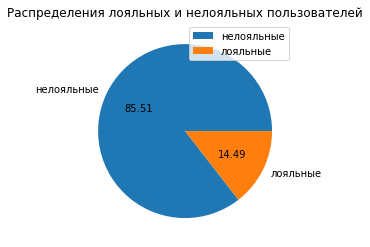

In [105]:
#df['Churn'].value_counts().plot(kind='bar', color=['g', 'r'], label='target')
plt.pie(df['Churn'].value_counts(), labels=['нелояльные','лояльные'],autopct='%.2f')
plt.legend()
plt.title('Распределения лояльных и нелояльных пользователей');

Сравним статистику по лояльным и нелояльным пользователям:

In [106]:
df[df['Churn'] == 0].mean()

Account length            100.793684
Area code                 437.074737
Number vmail messages       8.604561
Total day minutes         175.175754
Total day calls           100.283158
Total day charge           29.780421
Total eve minutes         199.043298
Total eve calls           100.038596
Total eve charge           16.918909
Total night minutes       200.133193
Total night calls         100.058246
Total night charge          9.006074
Total intl minutes         10.158877
Total intl calls            4.532982
Total intl charge           2.743404
Customer service calls      1.449825
Churn                       0.000000
dtype: float64

In [107]:
df[df['Churn'] == 1].mean()

Account length            102.664596
Area code                 437.817805
Number vmail messages       5.115942
Total day minutes         206.914079
Total day calls           101.335404
Total day charge           35.175921
Total eve minutes         212.410145
Total eve calls           100.561077
Total eve charge           18.054969
Total night minutes       205.231677
Total night calls         100.399586
Total night charge          9.235528
Total intl minutes         10.700000
Total intl calls            4.163561
Total intl charge           2.889545
Customer service calls      2.229814
Churn                       1.000000
dtype: float64

In [108]:
features_needed = ['Total day minutes', 'Total eve minutes', 'Total night minutes', 
                  'Total day charge', 'Total eve charge', 'Total night charge']

df.groupby(['Churn'])[features_needed].agg([np.min, np.max, np.mean, np.std])

Total day minutes                               Total eve minutes  \
                   amin   amax        mean        std              amin   
Churn                                                                     
0                   0.0  315.6  175.175754  50.181655               0.0   
1                   0.0  350.8  206.914079  68.997792              70.9   

                                    Total night minutes         ...  \
        amax        mean        std                amin   amax  ...   
Churn                                                           ...   
0      361.8  199.043298  50.292175                23.2  395.0  ...   
1      363.7  212.410145  51.728910                47.4  354.9  ...   

      Total day charge            Total eve charge                    \
                  mean        std             amin   amax       mean   
Churn                                                                  
0            29.780421   8.530835             0.00  30.75  16.918909   
1            35.175921  11.729710             6.03  30.91  18.054969   

                Total night charge                             
            std               amin   amax      mean       std  
Churn                                                          
0      4.274863               1.04  17.77  9.006074  2.299768  
1      4.396762               2.13  15.97  9.235528  2.121081  

[2 rows x 24 columns]

По данным выше видим, что у нелояльных пользователей выше такие характеристики, как:
* длительность разговора днем
* длительность разговоров вечером
* длительность разговоров ночью,

и, соответственно,
* общая сумма оплаты за услуги днем
* общая сумма оплаты за услуги вечером
* общая сумма оплаты за услуги ночью,

а также - ***количество обращений в сервисный центр***.

Построим матрицу корреляции вещественных признаков (уберем *State*, *International Plan*, *Voice mail plan* и *Area code*).

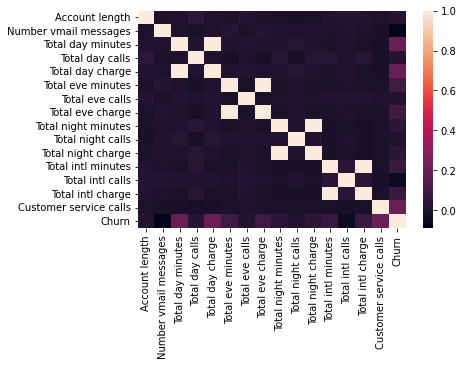

In [109]:
import seaborn as sns

matrix = df.drop(['State', 'International plan', 
                  'Voice mail plan',
                  'Area code'], axis=1).corr()

sns.heatmap(matrix)

Матрица корреляции подтверждает зависимость по длительности звонков и суммой оплаты в разбивке по дню/вечеру/ночи.

Построим PairPlot для вещественных признаков.

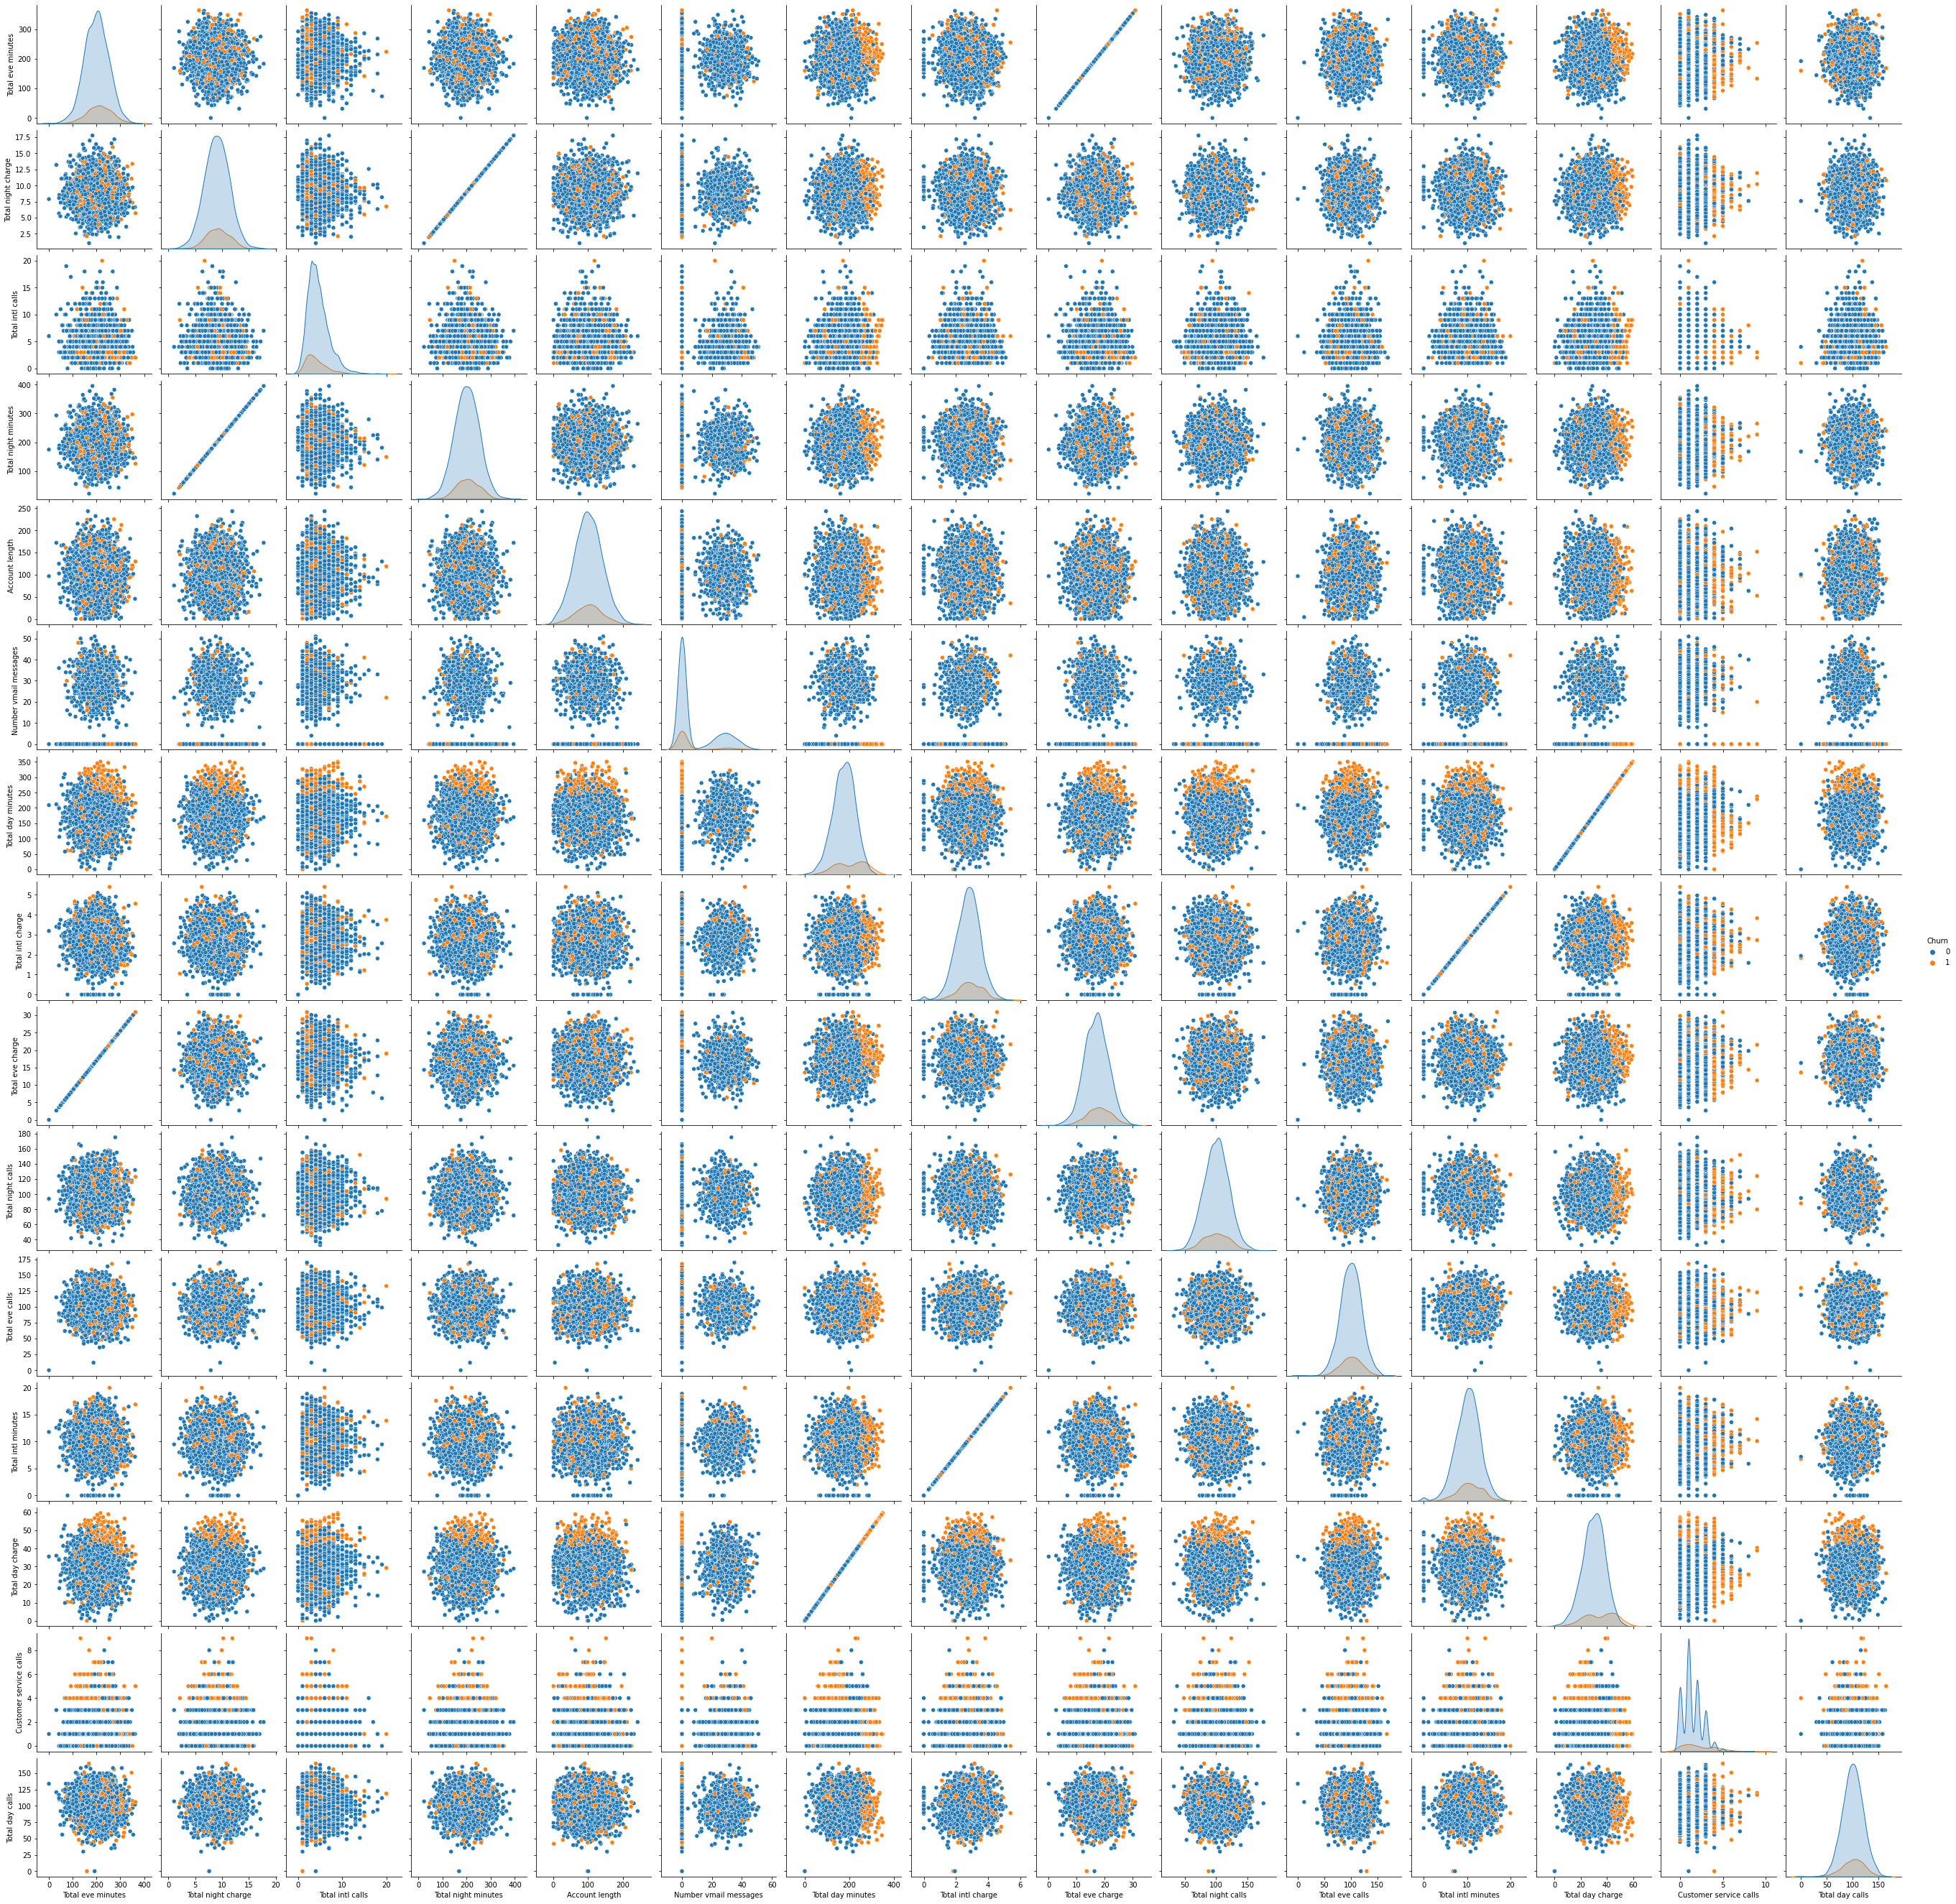

In [110]:
features_needed = list(set(df.columns) - set(['International plan', 'Voice mail plan',  'Area code', 'State']))

sns.pairplot(df[features_needed], hue='Churn', diag_kind="kde")

### **Можем сделать промежуточный вывод:**

Нелояльные пользователи, т.е. те, которые в итоге сменили компанию-оператора сотовой связи, совершают больше звонков и, соответственно, платят больше денег за тарифы. 
Одной из причин может являться неудовлетворение текущими тарифными планами оператора, включенными пакетами услуг. Стоит пересмотреть меню и наполнение тарифов, ценовую политику для повышения лояльности существующих пользователей и сокращения оттока.


Теперь узнаем как часто (и сколько раз) лояльные и нелояльные пользователи обращаются в сервисный центр.

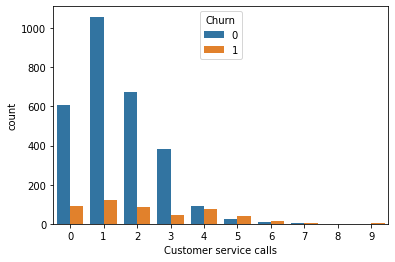

In [111]:
sns.countplot(x='Customer service calls', hue='Churn', data=df)

На первом, втором и третьем звонке в call-центр доля оттока среди клиентов небольшая, однако, с 4 и последующих звонков доля покинувших пользователей сначала практически сравнивается с лояльными пользователями, а затем и превышает их.
Из чего можем сделать вывод, что стоит пересмотреть скрипты/сценарии работы с проблемами пользователей и т.п. в call-центре.

Теперь узнаем как лояльные и нелояльные пользователи пользуются роумингом (признак "International plan").

In [112]:
pd.crosstab(df['Churn'], df['International plan'], margins=True)

International plan    No  Yes   All
Churn                              
0                   2664  186  2850
1                    346  137   483
All                 3010  323  3333

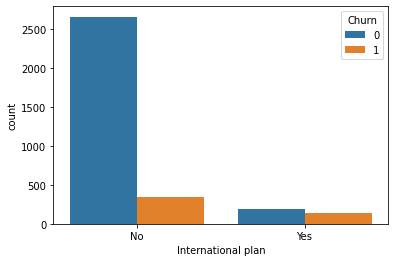

In [113]:
sns.countplot(x='International plan', hue='Churn', data=df)

Доля оттока существенно возрастает при пользовании услугами связи в роуминге.

Проверим аналогичную взаимосвязь между оттоком и пользованием голосовой почтой (Voice mail plan).

In [210]:
pd.crosstab(df['Churn'], df['Voice mail plan'], margins=True)

Voice mail plan    No  Yes   All
Churn                           
0                2008  842  2850
1                 403   80   483
All              2411  922  3333

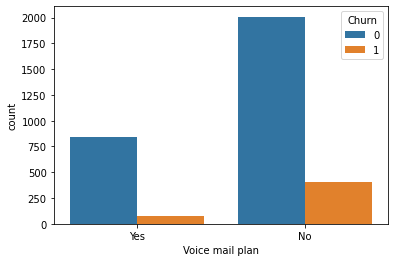

In [116]:
sns.countplot(x='Voice mail plan', hue='Churn', data=df)

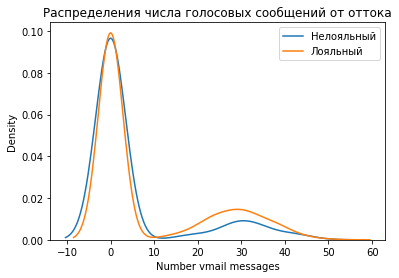

In [117]:
sns.distplot(df[df['Churn']==1]['Number vmail messages'],hist=False,label='Нелояльный')
sns.distplot(df[df['Churn']==0]['Number vmail messages'],hist=False, label='Лояльный')
plt.title('Распределения числа голосовых сообщений от оттока')
plt.legend()
plt.show()

Можно сказать, что наличие или отсутствие опции голосовой почты не влияет на лояльность (отток) пользователей. Также, число лояльных и нелояльных пользователей распределено примерно одинаково в зависимости от количества голосовых сообщений, отправленных пользователями каждой из групп.

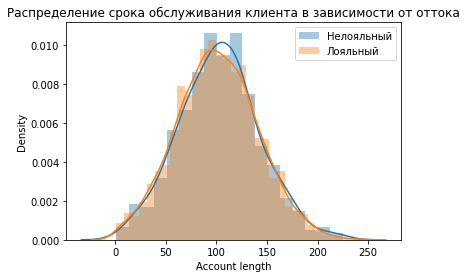

In [118]:
sns.distplot(df[df['Churn']==1]['Account length'],label='Нелояльный')
sns.distplot(df[df['Churn']==0]['Account length'],label='Лояльный')
plt.title('Распределение срока обслуживания клиента в зависимости от оттока')
plt.legend()
plt.show()

Распределение срока обслуживания клиентов в зависимости от лояльности и нелояльности пользователя практически одинаковы.

И напоследок посмотрим долю оттока в зависимости о штата (States), в котором находится пользователь.

In [145]:
df.groupby(['State'])['Churn'].agg([np.mean]).sort_values(by='mean', ascending=False)

mean
State          
NJ     0.264706
CA     0.264706
TX     0.250000
MD     0.242857
SC     0.233333
MI     0.219178
MS     0.215385
NV     0.212121
WA     0.212121
ME     0.209677
MT     0.205882
AR     0.200000
KS     0.185714
NY     0.180723
MN     0.178571
PA     0.177778
MA     0.169231
CT     0.162162
NC     0.161765
NH     0.160714
GA     0.148148
DE     0.147541
OK     0.147541
OR     0.141026
UT     0.138889
CO     0.136364
KY     0.135593
SD     0.133333
OH     0.128205
FL     0.126984
IN     0.126761
ID     0.123288
WY     0.116883
MO     0.111111
VT     0.109589
AL     0.100000
NM     0.096774
ND     0.096774
WV     0.094340
TN     0.094340
DC     0.092593
RI     0.092308
WI     0.089744
IL     0.086207
NE     0.081967
LA     0.078431
IA     0.068182
VA     0.064935
AZ     0.062500
AK     0.057692
HI     0.056604

Получаем, что в таких штатах как NJ, CA, TX, MD, SC, MI, MS, NV, WA, ME, MT и других доля оттока превышает среднюю долю оттока по всей стране. При этом имеются штаты, в которых доля ушедших клиентов не находится в диапазоне 5-7% (штаты HI, AK, AZ и другие).

Однако, стоит заметить, что данный датасет имеет всего 3333 записей о клиентах, тогда как число штатов довольно большое - 51, при этом число ушедших клиентов в расчете на каждый штат и того меньше, из-за чего на каждый штат может приходить совсем небольшое число покинувших компанию клиентов, соответственно, по полученным данным нельзя говорить о  прямой зависимости оттока клиентов от штата, т.к. данных недостаточно, а также сами данные о пользователях в конкретном штате могут иметь свои особенности.

# Выводы:

**Основные факторы, влияющие на отток:**


1.   Длительность разговора клиента в рассматриваемые временные промежутки (день, вечер, ночь). Чем больше клиент совершает звонков, чем чаще он разочаровывается в своем операторе сотовой связи (ОПС) и переходит к конкурентам.
2.   Доля недовольных пользователей существенна при пользовании услугами связи в роуминге.
3. Обращения клиентов в Call-центр, начиная с 4-го звонка, вызывают сильное недовольство клиентов, вынуждая их покидать текущий ОПС.


**Возможные пути уменьшения оттока:**


1.   Пересмотр тарифных планов. Установление более гибкой ценовой политики, возможность выбирать услуги, которые пользователь сам хотел бы видеть у себя в тарифе (конструктор тарифного меню).
2. Снижение стоимости тарифов. Но опять же, необходимо просчитать, чтобы эффект от снижения стоимости тарифов не стоил бы дороже, чем текущий уровень оттока пользователей.
3.   Повышения качества обслуживания в Call-центре. Необходима более внимательная и быстрая работа над проблемой клиента, с которой он был вынужден обратиться.
4. Провести расширенный анализ, собрав данные по клиентам в разрезе каждого штата, для понимания ситуации с оттоком и принятия более точных решений в зависимости от местоположения пользователей.

